In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import misc

In [2]:
train = pd.read_csv("C:/Users/nwalker018/Desktop/Datasets/Digit Recognizer/Digit_Recognizer_Train.csv")
test = pd.read_csv("C:/Users/nwalker018/Desktop/Datasets/Digit Recognizer/Digit_Recognizer_Test.csv")

train = pd.DataFrame(data=train)
test_x = pd.DataFrame(data=test)

train_y = pd.DataFrame(data=train[train.columns[0]])
train_x = pd.DataFrame(data=train[train.columns[1:]])


In [3]:
# recalculate pixel values to be between [0,1] rather than [0,255]
train_x = np.multiply(train_x, 1.0 / 255.0)

In [4]:
image_size = train_x.shape[1]
print('image_size =', format(image_size))

# since the images are square:
image_height = image_width = np.sqrt(image_size).astype(np.uint8)
print('image_height = {0}\nimage_width = {1}'.format(image_height, image_width))

image_size = 784
image_height = 28
image_width = 28


In [5]:
# Reshape an image into a 28x28 matrix 
an_image = train_x.loc[8].values.reshape(image_width, image_height)
an_image.shape

(28, 28)

In [6]:
# Output one of the images:
#  
def display(img):
    one_image = train_x.loc[img].values.reshape(image_width, image_height)
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)
    plt.show()

In [7]:
# Create a convolved feature using an example image and filter

In [8]:
# Example image
img1 = np.matrix(train_x.loc[10].values.reshape(image_width, image_height))

In [9]:
# Example filter layer:
filter1 = np.matrix('1, 0, -1; 0, 0, 0; -1, 0, 1')
filter1

matrix([[ 1,  0, -1],
        [ 0,  0,  0],
        [-1,  0,  1]])

In [10]:
filter_height = filter1.shape[0]
filter_width = filter1.shape[1]
print('filter_height = {0}\nfilter_width = {1}'.format(filter_height, filter_width))

filter_height = 3
filter_width = 3


In [11]:
# options:
# 1.) matrix.getA1 to transform matrix into a 1d array, multiply 
print(filter1[0:2,0:2])
print()
print(filter1[0:2,1:3])
print()
print(filter1[0:3,0:2])

[[1 0]
 [0 0]]

[[ 0 -1]
 [ 0  0]]

[[ 1  0]
 [ 0  0]
 [-1  0]]


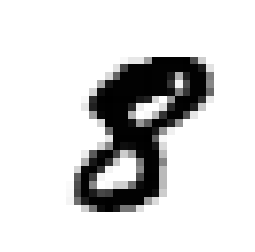

In [16]:
display(10)

In [13]:
# Function to create a convolved feature:
def convolve(img):
    matrix = train_x.loc[img].values.reshape(image_width, image_height)
    my_arr = []
    for i in range(0,image_height-filter_height): # iterate through matrix rows
        for j in range(0,image_width-filter_width): # iterate through matrix columns
            slice = matrix[i:i+filter_height,j:j+filter_width] # take a subset of the image matrix in order to
            slide = np.multiply(slice, filter1)
            sum1 = np.sum(slide)
            my_arr.append(sum1)
    np.asarray(my_arr) 
    my_mat = np.reshape(my_arr, (25,25))
    my_mat = np.matrix(my_mat)
    
    return my_mat

In [14]:
# Plotting function for the convolved image: 
def plot_conv(img):
    plt.axis('off')
    plt.imshow(convolve(img), cmap=cm.binary)
    plt.show()
    return

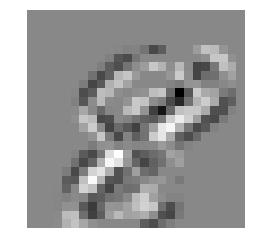

In [15]:
plot_conv(10)

In [17]:
# ReLU function:
def ReLU(x):
    y = max(x, 0)
    return y

In [18]:
# sigmoid function:
def sigmoid(x):
    y = 1 / (1 + math.exp(-x))
    return y

In [19]:
# tanh function: 
def tanh(x):
    y = 1 - math.tanh(x)**2
    return y

In [20]:
#activation function:
def activate(img):
    my_arr = []
    conv = convolve(img)
    matrix_height = conv.shape[0]
    matrix_width = conv.shape[1]
    for i in range(0, matrix_height):
        for j in range(0, matrix_width):
            spot = conv[i,j]
            spot = ReLU(spot) # change activation function here to change the activation function
            my_arr.append(spot)
    
    np.asarray(my_arr)
    my_mat = np.reshape(my_arr, (matrix_height, matrix_width))
    my_mat = np.matrix(my_mat)
    
    return my_mat

In [21]:
# Plotting function for the activation layer: 
def plot_active(img):
    plt.axis('off')
    plt.imshow(activate(img), cmap=cm.binary)
    plt.show()
    return

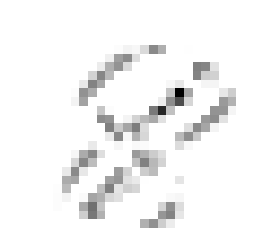

In [22]:
plot_active(10)

In [23]:
# pooling function:
def pooling(img):
    my_arr = []
    matrix = activate(img)
    matrix_height = matrix.shape[0]
    matrix_width = matrix.shape[1]
    if matrix_height % 2 == 0:
        pool_dim = 2
    elif matrix_height % 3 == 0:
        pool_dim = 3
    elif matrix_height % 5 == 0:
        pool_dim = 5
    elif matrix_height % 7 == 0:
        pool_dim = 7
    else:
        pool_dim = 1
        
    for i in range(0,matrix_height, pool_dim):
        for j in range(0,matrix_width, pool_dim):
            pool = matrix[i:i+pool_dim, j:j+pool_dim]
            sum_pool = np.sum(pool)
            mean_pool = np.mean(pool)
            max_pool = np.max(pool)
            my_arr.append(max_pool) # specify pooling type here
    
    my_mat_height = int(matrix_height / pool_dim)
    my_mat_width = int(matrix_width / pool_dim)
    np.asarray(my_arr)
    my_mat = np.reshape(my_arr, (my_mat_height, my_mat_width))
    my_mat = np.matrix(my_mat)
    return my_mat

In [24]:
# Plotting function for the pooled image: 
def plot_pool(img):
    plt.axis('off')
    plt.imshow(pooling(img), cmap=cm.binary)
    plt.show()
    return

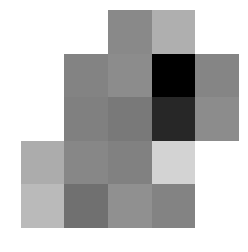

In [25]:
plot_pool(10)

In [26]:
def softmax(img):
    matrix = pooling(img)
    matrix_height = matrix.shape[0]
    matrix_width = matrix.shape[1]
    inputs = matrix.getA1()
    soft = np.exp(inputs) / float(sum(np.exp(inputs)))
    my_mat = np.reshape(soft, (matrix_height, matrix_width))
    my_mat = np.matrix(my_mat)
    return my_mat

In [27]:
# Plotting function for the pooled image: 
def plot_soft(img):
    plt.axis('off')
    plt.imshow(softmax(img), cmap=cm.binary)
    plt.show()
    return

In [28]:
softmax(4)

matrix([[ 0.019075  ,  0.04985721,  0.03175921,  0.04591584,  0.019075  ],
        [ 0.04034221,  0.04985721,  0.04484808,  0.05144615,  0.04432355],
        [ 0.05064545,  0.03408205,  0.04098002,  0.04664177,  0.04591584],
        [ 0.019075  ,  0.05144615,  0.03302941,  0.0424522 ,  0.05104423],
        [ 0.019075  ,  0.0424522 ,  0.0335516 ,  0.04719374,  0.04591584]])